In [19]:
# dwt2 小波图像处理
import pywt
import cv2
import numpy as np
# 读取灰度图
img=cv2.imread("./APTOS/train_resized_images/1002b5151b8e.png",0)
#对img进行haar小波变换,变量分别是低频，水平高频，垂直高频，对角线高频
cA,(cH,cV,cD)=pywt.dwt2(img,"haar")
#小波变换之后，低频分量对应的图像
cv2.imwrite('1.png',np.uint8(cA/np.max(cA)*255))
# 小波变换之后，水平方向上高频分量对应的图像
cv2.imwrite('2.png',np.uint8(cH/np.max(cH)*255))
# 小波变换之后，垂直方向上高频分量对应的图像
cv2.imwrite('3.png',np.uint8(cV/np.max(cV)*255))
# 小波变换之后，对角线方向上高频分量对应的图像
cv2.imwrite('4.png',np.uint8(cD/np.max(cD)*255))
# 根据小波系数重构的图像
rimg=pywt.idwt2((cA,(cH,cV,cD)),"haar")
cv2.imwrite("5.png",np.uint8(rimg))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


True

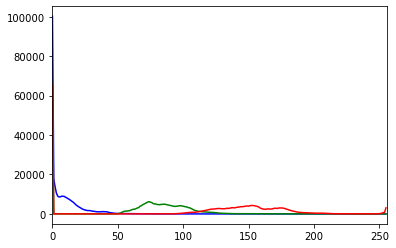

In [20]:
# histogram calculation
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('./APTOS/train_resized_images/1002b5151b8e.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

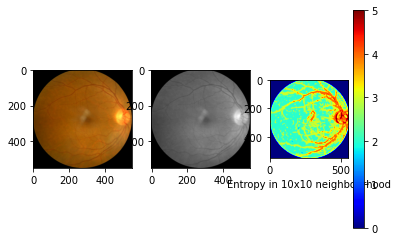

In [23]:
# calculate entropy
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def entropy(signal):
    lensig=signal.size
    symset=list(set(signal))
    numsym=len(symset)
    propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
    ent=np.sum([p*np.log2(1.0/p) for p in propab])
    return ent

colorIm=Image.open('./APTOS/train_resized_images/1002b5151b8e.png')
greyIm=colorIm.convert('L')
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)

N=5
S=greyIm.shape
E=np.array(greyIm)
for row in range(S[0]):
    for col in range(S[1]):
        Lx=np.max([0,col-N])
        Ux=np.min([S[1],col+N])
        Ly=np.max([0,row-N])
        Uy=np.min([S[0],row+N])
        region=greyIm[Ly:Uy,Lx:Ux].flatten()
        E[row,col]=entropy(region)

plt.subplot(1,3,1)
plt.imshow(colorIm)

plt.subplot(1,3,2)
plt.imshow(greyIm, cmap=plt.cm.gray)

plt.subplot(1,3,3)
plt.imshow(E, cmap=plt.cm.jet)
plt.xlabel('Entropy in 10x10 neighbourhood')
plt.colorbar()

plt.show()

usage: ipykernel_launcher.py [-h] [--input INPUT]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Timo\AppData\Roaming\jupyter\runtime\kernel-8730068c-7707-4ec2-b4fb-8251d7759b56.json


SystemExit: 2

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
